In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dataset.csv


In [2]:
import pandas as pd
dataset = pd.read_csv("../input/dataset.csv")
dataset.head(5)

,Unnamed: 0,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,mulliken_charge_0,mulliken_charge_1,atom_0,...,YXmag_1,ZXmag_1,XYmag_1,YYmag_1,ZYmag_1,XZmag_1,YZmag_1,ZZmag_1,atom1_0,atom1_1
0,0,0,dsgdb9nsd_000001,1,0,1,84.8076,0.133921,-0.535689,0,...,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,0,0
1,1,4,dsgdb9nsd_000001,2,0,1,84.8074,0.133922,-0.535689,0,...,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,0,0
2,2,7,dsgdb9nsd_000001,3,0,1,84.8093,0.133923,-0.535689,0,...,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,0,0
3,3,9,dsgdb9nsd_000001,4,0,1,84.8095,0.133923,-0.535689,0,...,0.0000,-0.0001,0.0000,195.3171,0.0007,-0.0001,0.0007,195.3169,0,0
4,4,1,dsgdb9nsd_000001,1,2,0,-11.2570,0.133921,0.133922,0,...,1.2173,-4.1474,1.2173,28.9036,-1.6036,-4.1476,-1.6036,33.8967,1,0


In [3]:
cols = dataset.columns.tolist()
print(cols)

['Unnamed: 0', 'id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type', 'scalar_coupling_constant', 'mulliken_charge_0', 'mulliken_charge_1', 'atom_0', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'potential_energy', 'fc', 'sd', 'pso', 'dso', 'XXmag_0', 'YXmag_0', 'ZXmag_0', 'XYmag_0', 'YYmag_0', 'ZYmag_0', 'XZmag_0', 'YZmag_0', 'ZZmag_0', 'XXmag_1', 'YXmag_1', 'ZXmag_1', 'XYmag_1', 'YYmag_1', 'ZYmag_1', 'XZmag_1', 'YZmag_1', 'ZZmag_1', 'atom1_0', 'atom1_1']


In [4]:
ML_Project_Readings = []
ML_Linear_Regression_With_All_Features = {
    "Description":"Our First Model consist of 37 features to predict Scalar_Coupling_Constant using Linear Regression"
}


In [5]:

predictors = ['atom_index_0', 'atom_index_1', 'type', 'mulliken_charge_0', 'mulliken_charge_1', 'atom_0', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'potential_energy', 'fc', 'sd', 'pso', 'dso', 'XXmag_0', 'YXmag_0', 'ZXmag_0', 'XYmag_0', 'YYmag_0', 'ZYmag_0', 'XZmag_0', 'YZmag_0', 'ZZmag_0', 'XXmag_1', 'YXmag_1', 'ZXmag_1', 'XYmag_1', 'YYmag_1', 'ZYmag_1', 'XZmag_1', 'YZmag_1', 'ZZmag_1', 'atom1_0', 'atom1_1']
X = dataset[predictors]
print(X.size)
print(dataset['scalar_coupling_constant'].size)
# atom_index_0, atom_index_1, type, atom_0, 'atom1_0', 'atom1_1'

172385812
4659076


In [6]:
from sklearn.linear_model import LinearRegression
predictors = ['atom_index_0', 'atom_index_1', 'type', 'mulliken_charge_0', 'mulliken_charge_1', 'atom_0', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'potential_energy', 'fc', 'sd', 'pso', 'dso', 'XXmag_0', 'YXmag_0', 'ZXmag_0', 'XYmag_0', 'YYmag_0', 'ZYmag_0', 'XZmag_0', 'YZmag_0', 'ZZmag_0', 'XXmag_1', 'YXmag_1', 'ZXmag_1', 'XYmag_1', 'YYmag_1', 'ZYmag_1', 'XZmag_1', 'YZmag_1', 'ZZmag_1', 'atom1_0', 'atom1_1']
X = dataset[predictors]
y = dataset['scalar_coupling_constant']

lm = LinearRegression()
model = lm.fit(X, y)

model.score(X,y)

ML_Linear_Regression_With_All_Features["Score for whole model after linear regression"]= model.score(X,y)

print(lm.intercept_)
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])  
coeff_df

-8.76655146697658e-07


,Coefficient
atom_index_0,-4.351948e-09
atom_index_1,1.144040e-08
type,1.472904e-07
mulliken_charge_0,-5.459698e-07
mulliken_charge_1,4.006877e-07
atom_0,-3.441691e-15
x_0,-5.013803e-10
y_0,-1.450548e-08
z_0,-3.755799e-09
x_1,-7.556873e-09


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_Train_Main = X_train
X_Test_Main = X_test
y_train_main = y_train
y_test_main = y_test

In [8]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.9999999999944928

In [9]:
Y_pred = reg.predict(X_test)
y_test = np.array(list(y_test))
Y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,2.48353,2.483527
1,1.37712,1.377118
2,82.19180,82.191747
3,120.59700,120.596576
4,4.70460,4.704603
...,...,...
931811,84.46110,84.461080
931812,12.38000,12.380025
931813,1.13134,1.131332
931814,1.36372,1.363726


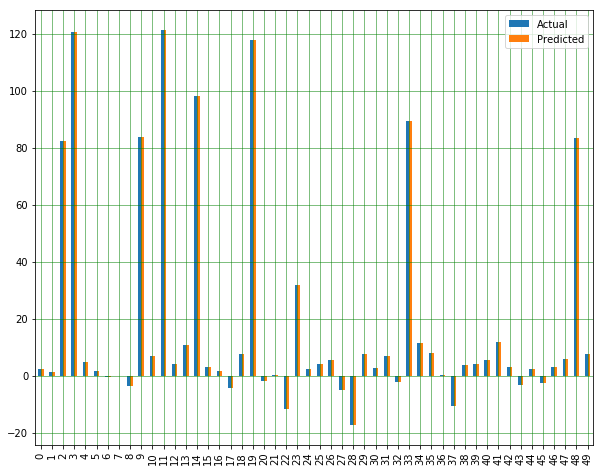

In [10]:
import matplotlib.pyplot as plt
df1 =df.head(50)
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

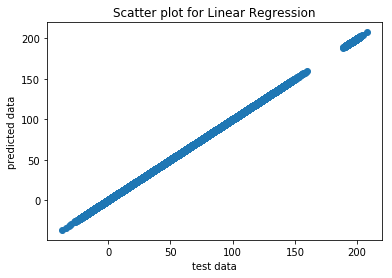

In [11]:
import matplotlib.pyplot as plt
plt.title('Scatter plot for Linear Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.scatter(x=y_test, y=Y_pred)
plt.show()

In [12]:
from sklearn import metrics

# print result of mae
ML_Linear_Regression_With_All_Features["Mean Absolute error"] = metrics.mean_absolute_error(y_test, Y_pred)
print('Mean Absolute error:',ML_Linear_Regression_With_All_Features.get("Mean Absolute error"))

# print result of MSE
ML_Linear_Regression_With_All_Features["Mean Sqaured error"]=metrics.mean_squared_error(y_test, Y_pred)
print('Mean Sqaured error:',ML_Linear_Regression_With_All_Features.get("Mean Sqaured error"))

#print result of RMSE
ML_Linear_Regression_With_All_Features["Root mean squared error"] =  metrics.mean_squared_error(y_test, Y_pred)
print('Root mean squared error:',np.sqrt(ML_Linear_Regression_With_All_Features.get("Root mean squared error"))) 


Mean Absolute error: 2.2257477847449815e-05
Mean Sqaured error: 6.68189332137739e-09
Root mean squared error: 8.174284874762679e-05


In [13]:
import statsmodels.api as sm
#X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   1.000
Model:                                  OLS   Adj. R-squared (uncentered):              1.000
Method:                       Least Squares   F-statistic:                          2.270e+16
Date:                      Fri, 10 Apr 2020   Prob (F-statistic):                        0.00
Time:                              15:50:32   Log-Likelihood:                      2.9782e+07
No. Observations:                   3727260   AIC:                                 -5.956e+07
Df Residuals:                       3727224   BIC:                                 -5.956e+07
Df Model:                                36                                                  
Covariance Type:                  nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
atom_index_0      -1.849e-08   1.74e-08     -1.065      0.287   -5.25e-08    1.55e-08
atom_index_1       5.028e-11   2.03e-08      0.002      0.998   -3.97e-08    3.98e-08
type               2.317e-07   5.31e-07      0.436      0.663    -8.1e-07    1.27e-06
mulliken_charge_0  -6.12e-07   1.06e-06     -0.577      0.564   -2.69e-06    1.47e-06
mulliken_charge_1  3.913e-07   2.46e-07      1.588      0.112   -9.17e-08    8.74e-07
atom_0             1.693e-14    5.5e-20   3.08e+05      0.000    1.69e-14    1.69e-14
x_0               -1.801e-09   3.15e-08     -0.057      0.954   -6.35e-08    5.99e-08
y_0               -3.206e-08   3.26e-08     -0.984      0.325   -9.59e-08    3.18e-08
z_0               -5.229e-09   3.24e-08     -0.161      0.872   -6.88e-08    5.84e-08
x_1               -6.955e-09   3.79e-08     -0.183      0.854   -8.13e-08    6.74e-08
y_1               -3.614e-08   3.71e-08     -0.974      0.330   -1.09e-07    3.66e-08
z_1                7.721e-09   4.04e-08      0.191      0.849   -7.15e-08     8.7e-08
potential_energy  -1.128e-09   9.63e-10     -1.171      0.241   -3.02e-09     7.6e-10
fc                    1.0000   4.89e-09   2.05e+08      0.000       1.000       1.000
sd                    1.0000   4.15e-07   2.41e+06      0.000       1.000       1.000
pso                   1.0000   1.61e-07    6.2e+06      0.000       1.000       1.000
dso                   1.0000   1.45e-07   6.91e+06      0.000       1.000       1.000
XXmag_0           -1.883e-08   1.26e-08     -1.493      0.135   -4.36e-08    5.88e-09
YXmag_0           -2.953e-08   2.51e-08     -1.177      0.239   -7.87e-08    1.96e-08
ZXmag_0           -3.077e-08   2.73e-08     -1.126      0.260   -8.43e-08    2.28e-08
XYmag_0            4.451e-08   2.65e-08      1.678      0.093   -7.48e-09    9.65e-08
YYmag_0           -1.232e-11   1.16e-08     -0.001      0.999   -2.28e-08    2.28e-08
ZYmag_0            2.806e-08   2.79e-08      1.007      0.314   -2.65e-08    8.26e-08
XZmag_0            9.101e-09   2.93e-08      0.310      0.756   -4.84e-08    6.66e-08
YZmag_0           -5.961e-08   2.92e-08     -2.044      0.041   -1.17e-07   -2.46e-09
ZZmag_0            1.865e-09   1.04e-08      0.180      0.857   -1.84e-08    2.22e-08
XXmag_1           -4.391e-10   9.09e-10     -0.483      0.629   -2.22e-09    1.34e-09
YXmag_1            5.625e-10   3.49e-09      0.161      0.872   -6.27e-09     7.4e-09
ZXmag_1            8.613e-09   4.71e-09      1.828      0.068   -6.24e-10    1.78e-08
XYmag_1           -1.831e-09   3.53e-09     -0.518      0.604   -8.76e-09     5.1e-09
YYmag_1            2.618e-10   1.05e-09      0.250      0.802   -1.79e-09    2.3

In [ ]:
 from sklearn import metrics

# print result of mae
ML_Linear_Regression_With_All_Features["Mean Absolute error"] = metrics.mean_absolute_error(y_test, Y_pred)
print('Mean Absolute error:',ML_Linear_Regression_With_All_Features.get("Mean Absolute error"))

# print result of MSE
ML_Linear_Regression_With_All_Features["Mean Sqaured error"]=metrics.mean_squared_error(y_test, Y_pred)
print('Mean Sqaured error:',ML_Linear_Regression_With_All_Features.get("Mean Sqaured error"))

#print result of RMSE
ML_Linear_Regression_With_All_Features["Root mean squared error"] =  metrics.mean_squared_error(y_test, Y_pred)
print('Root mean squared error:',np.sqrt(ML_Linear_Regression_With_All_Features.get("Root mean squared error"))) 

 ML_Linear_Regression_With_All_Features

In [14]:
ML_Project_Readings.append(ML_Linear_Regression_With_All_Features)

In [15]:
ML_Linear_Regression_With_Pearson_Filter_Features ={
    "Description" : "In this model we will do linear regression with 10 features selected with Pearson's Cofficient filter approach."
}

In [16]:
# Now, Feature Selections..
featuresNames = list(X_train.columns)
print(featuresNames)

['atom_index_0', 'atom_index_1', 'type', 'mulliken_charge_0', 'mulliken_charge_1', 'atom_0', 'x_0', 'y_0', 'z_0', 'x_1', 'y_1', 'z_1', 'potential_energy', 'fc', 'sd', 'pso', 'dso', 'XXmag_0', 'YXmag_0', 'ZXmag_0', 'XYmag_0', 'YYmag_0', 'ZYmag_0', 'XZmag_0', 'YZmag_0', 'ZZmag_0', 'XXmag_1', 'YXmag_1', 'ZXmag_1', 'XYmag_1', 'YYmag_1', 'ZYmag_1', 'XZmag_1', 'YZmag_1', 'ZZmag_1', 'atom1_0', 'atom1_1']


In [17]:
print(len(featuresNames))

37


In [18]:
coreFeatures = 10

In [19]:
#Pearson Co-relation
#This is a filter-based method.  We check the absolute value of the Pearson's correlation between the target and numerical features in our dataset.
#We keep the top n features based on this criterion.

def cor_selector(X, y,coreFeatures):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-coreFeatures:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,coreFeatures)
print(str(len(cor_feature)), 'selected features')

/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/conda/lib/python3.6/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


10 selected features


In [20]:
cor_feature

['atom_index_1',
 'YYmag_1',
 'XXmag_1',
 'ZZmag_1',
 'atom1_0',
 'sd',
 'mulliken_charge_1',
 'dso',
 'type',
 'fc']

In [42]:
X_Train_PCFS = X_Train_Main[['atom_index_1','YYmag_1','XXmag_1', 'ZZmag_1', 'atom1_0', 'sd', 'mulliken_charge_1', 'dso', 'type', 'fc']]
X_Test_PCFS = X_Test_Main[['atom_index_1','YYmag_1','XXmag_1', 'ZZmag_1', 'atom1_0', 'sd', 'mulliken_charge_1', 'dso', 'type', 'fc']]

X_Train_PCFS.head()

,atom_index_1,YYmag_1,XXmag_1,ZZmag_1,atom1_0,sd,mulliken_charge_1,dso,type,fc
1498760,5,137.7096,138.3049,147.0733,0,-0.055570,-0.255440,-0.482430,0,9.01831
996187,13,31.9052,29.6590,24.2701,1,0.019307,0.140554,-2.112270,0,3.64098
3423770,6,156.5484,126.1526,124.9608,0,0.053994,-0.155069,-0.467163,0,11.13810
2536259,1,141.5761,150.6658,106.5136,0,0.124032,-0.051001,-0.037224,0,-2.83277
2874753,4,114.9636,139.7727,130.8289,0,0.136812,0.067854,0.040166,0,-4.63883


In [36]:
reg = LinearRegression().fit(X_Train_PCFS, y_train)
ML_Linear_Regression_With_Pearson_Filter_Features["Score with Linear Regression on 10 features only"] = reg.score(X_Train_PCFS, y_train)

In [37]:
Y_pred = reg.predict(X_Test_PCFS)
y_test = np.array(list(y_test))
Y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,2.48353,2.446526
1,1.37712,1.348550
2,82.19180,82.095771
3,120.59700,121.562975
4,4.70460,4.649040
...,...,...
931811,84.46110,84.665820
931812,12.38000,12.370387
931813,1.13134,1.298982
931814,1.36372,1.107735


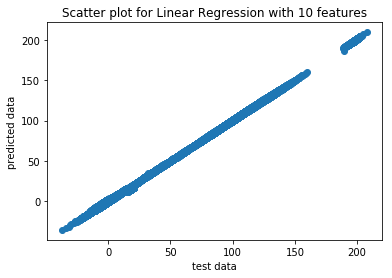

In [38]:
import matplotlib.pyplot as plt
plt.title('Scatter plot for Linear Regression with 10 features')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.scatter(x=y_test, y=Y_pred)
plt.show()

In [43]:
import statsmodels.api as sm
#X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_Train_PCFS).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     scalar_coupling_constant   R-squared (uncentered):                   1.000
Model:                                  OLS   Adj. R-squared (uncentered):              1.000
Method:                       Least Squares   F-statistic:                          7.559e+09
Date:                      Fri, 10 Apr 2020   Prob (F-statistic):                        0.00
Time:                              16:50:10   Log-Likelihood:                     -4.0137e+05
No. Observations:                   3727260   AIC:                                  8.028e+05
Df Residuals:                       3727250   BIC:                                  8.029e+05
Df Model:                                10                                                  
Covariance Type:                  nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
atom_index_1         -0.0046   5.03e-05    -90.686      0.000      -0.005      -0.004
YYmag_1               0.0005   3.35e-06    143.480      0.000       0.000       0.000
XXmag_1               0.0006   2.81e-06    227.311      0.000       0.001       0.001
ZZmag_1              -0.0010   2.75e-06   -347.200      0.000      -0.001      -0.001
atom1_0               0.0741      0.001     87.480      0.000       0.072       0.076
sd                    1.8336      0.001   1432.224      0.000       1.831       1.836
mulliken_charge_1    -0.1387      0.001   -197.133      0.000      -0.140      -0.137
dso                   0.2512      0.000    981.355      0.000       0.251       0.252
type                  2.0630      0.001   1515.641      0.000       2.060       2.066
fc                    0.9873   1.44e-05   6.84e+04      0.000       0.987       0.987
==============================================================================
Omnibus:                  3060123.960   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        830905100.489
Skew:                           3.054   Prob(JB):                         0.00
Kurtosis:                      75.890   Cond. No.                     2.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# print result of mae
ML_Linear_Regression_With_Pearson_Filter_Features["Mean Absolute error"] = metrics.mean_absolute_error(y_test, Y_pred)
print('Mean Absolute error:',ML_Linear_Regression_With_Pearson_Filter_Features.get("Mean Absolute error"))

# print result of MSE
ML_Linear_Regression_With_Pearson_Filter_Features["Mean Sqaured error"]=metrics.mean_squared_error(y_test, Y_pred)
print('Mean Sqaured error:',ML_Linear_Regression_With_Pearson_Filter_Features.get("Mean Sqaured error"))

#print result of RMSE
ML_Linear_Regression_With_Pearson_Filter_Features["Root mean squared error"] =  metrics.mean_squared_error(y_test, Y_pred)
print('Root mean squared error:',np.sqrt(ML_Linear_Regression_With_Pearson_Filter_Features.get("Root mean squared error"))) 

Mean Absolute error: 0.1327074065340824
Mean Sqaured error: 0.06999401000356595
Root mean squared error: 0.2645638108350535


In [ ]:
ML_Linear_Regression_With_Pearson_Filter_Features


In [ ]:
ML_Project_Readings.append(ML_Linear_Regression_With_Pearson_Filter_Features)
ML_Project_Readings

In [ ]:
ML_Linear_Regression_With_Original_Features ={
    "Description":"In this model we will do linear regression with original features as given in Kaggle Dataset"
}

In [ ]:
X_Train_OR = X_Train_Main[['atom_index_0', 'atom_index_1','type', 'atom_0', 'atom1_0', 'atom1_1']]
X_Test_OR = X_Test_Main[['atom_index_0', 'atom_index_1', 'type', 'atom_0', 'atom1_0', 'atom1_1']]

X_Train_OR.head()

In [ ]:
reg = LinearRegression().fit(X_Train_OR, y_train)
ML_Linear_Regression_With_Original_Features["Score with Linear Regression on original features"] = reg.score(X_Train_OR, y_train)

In [ ]:
Y_pred = reg.predict(X_Test_OR)
y_test = np.array(list(y_test))
Y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

In [ ]:
import matplotlib.pyplot as plt
plt.title('Scatter plot for Linear Regression with original features')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.scatter(x=y_test, y=Y_pred)
plt.show()

In [ ]:
# print result of mae
ML_Linear_Regression_With_Original_Features["Mean Absolute error"] = metrics.mean_absolute_error(y_test, Y_pred)
print('Mean Absolute error:',ML_Linear_Regression_With_Original_Features.get("Mean Absolute error"))

# print result of MSE
ML_Linear_Regression_With_Original_Features["Mean Sqaured error"]=metrics.mean_squared_error(y_test, Y_pred)
print('Mean Sqaured error:',ML_Linear_Regression_With_Original_Features.get("Mean Sqaured error"))

#print result of RMSE
ML_Linear_Regression_With_Original_Features["Root mean squared error"] =  metrics.mean_squared_error(y_test, Y_pred)
print('Root mean squared error:',np.sqrt(ML_Linear_Regression_With_Original_Features.get("Root mean squared error"))) 

In [ ]:
ML_Linear_Regression_With_Original_Features


In [ ]:
ML_Project_Readings.append(ML_Linear_Regression_With_Original_Features)
ML_Project_Readings

In [ ]:
ML_SVM_Regression_With_Original_Features ={
    "Description":"In this model we will do SVM Regression with all 37 features"
}

In [ ]:
X_train
y_train

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVR(kernel='rbf') # RBF Kernel

X_TRAIN_SVR = X_train.head(1000)
y_train_svr = y_train.head(1000)

#Train the model using the training sets
clf.fit(X_TRAIN_SVR, y_train_svr)

#Predict the response for test dataset
y_pred_svr = clf.predict(X_test.head(1000))

In [ ]:
from sklearn import metrics

y_test_svr = np.array(list(y_test_main.head(1000)))
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",clf.score(X_TRAIN_SVR, y_train_svr))

In [23]:
ML_Ridge_Regression_With_Original_Features ={
    "Description":"In this model we will do Ridge Regression with all 37 features"
}

In [24]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=100) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [25]:
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_Test_Main, y_test_main)


In [26]:
print(Ridge_train_score)
ML_Ridge_Regression_With_Original_Features["Model accuracy for ridge regression"] = Ridge_test_score
print(Ridge_test_score)


0.9999999999300817
0.9999999999309029


In [27]:
Y_pred = rr.predict(X_Test_Main)
y_test = np.array(list(y_test))
Y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,2.48353,2.483638
1,1.37712,1.377090
2,82.19180,82.191719
3,120.59700,120.596394
4,4.70460,4.705249
...,...,...
931811,84.46110,84.461223
931812,12.38000,12.380681
931813,1.13134,1.130749
931814,1.36372,1.364082


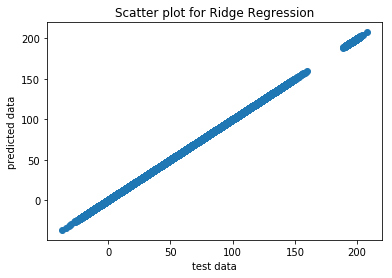

In [28]:
import matplotlib.pyplot as plt
plt.title('Scatter plot for Ridge Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.scatter(x=y_test, y=Y_pred)
plt.show()

In [29]:
# print result of mae
ML_Ridge_Regression_With_Original_Features["Mean Absolute error"] = metrics.mean_absolute_error(y_test, Y_pred)
print('Mean Absolute error:',ML_Ridge_Regression_With_Original_Features.get("Mean Absolute error"))

# print result of MSE
ML_Ridge_Regression_With_Original_Features["Mean Sqaured error"]=metrics.mean_squared_error(y_test, Y_pred)
print('Mean Sqaured error:',ML_Ridge_Regression_With_Original_Features.get("Mean Sqaured error"))

#print result of RMSE
ML_Ridge_Regression_With_Original_Features["Root mean squared error"] =  metrics.mean_squared_error(y_test, Y_pred)
print('Root mean squared error:',np.sqrt(ML_Ridge_Regression_With_Original_Features.get("Root mean squared error"))) 



Mean Absolute error: 0.0001877974524837551
Mean Sqaured error: 8.449807451100318e-08
Root mean squared error: 0.00029068552511434616


In [ ]:
ML_Project_Readings.append(ML_Ridge_Regression_With_Original_Features)
ML_Project_Readings

In [30]:
ML_Lasso_Regression_With_Original_Features ={
    "Description":"In this model we will do Lasso Regression with all 37 features"
}

In [31]:
X_Train_Lasso = X_Train_Main 
X_Test_Lasso = X_Test_Main 
y_train_lasso = y_train_main
y_test_lasso = y_test_main 

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(X_Train_Lasso,y_train_lasso)
train_score=lasso.score(X_Train_Lasso,y_train_lasso)
test_score=lasso.score(X_Test_Lasso,y_test_lasso)
coeff_used = np.sum(lasso.coef_!=0)

In [33]:
print(train_score)
ML_Lasso_Regression_With_Original_Features["Model accuracy for Lasso regression"] = test_score
print(test_score)
ML_Lasso_Regression_With_Original_Features["Model feature selection by Lasso"] = coeff_used
print(coeff_used)

0.9999921609934729
0.9999922492397231
11


In [34]:
Y_pred = lasso.predict(X_Test_Lasso)
y_test = np.array(list(y_test_lasso))
Y_pred = np.array(Y_pred)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,2.48353,2.529821
1,1.37712,1.388266
2,82.19180,82.152065
3,120.59700,120.532320
4,4.70460,4.940885
...,...,...
931811,84.46110,84.454153
931812,12.38000,12.649911
931813,1.13134,0.920975
931814,1.36372,1.509631


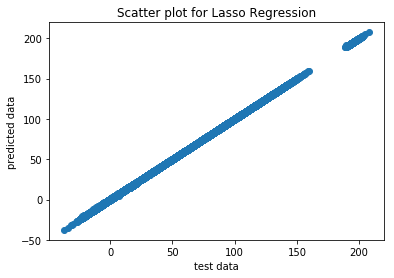

In [35]:
import matplotlib.pyplot as plt
plt.title('Scatter plot for Lasso Regression')
plt.xlabel('test data')
plt.ylabel('predicted data')
plt.scatter(x=y_test, y=Y_pred)
plt.show()

ValueError: shapes (3727260,37) and (3727260,37) not aligned: 37 (dim 1) != 3727260 (dim 0)

In [39]:
# print result of mae
ML_Lasso_Regression_With_Original_Features["Mean Absolute error"] = metrics.mean_absolute_error(y_test, Y_pred)
print('Mean Absolute error:',ML_Lasso_Regression_With_Original_Features.get("Mean Absolute error"))

# print result of MSE
ML_Lasso_Regression_With_Original_Features["Mean Sqaured error"]=metrics.mean_squared_error(y_test, Y_pred)
print('Mean Sqaured error:',ML_Lasso_Regression_With_Original_Features.get("Mean Sqaured error"))

#print result of RMSE
ML_Lasso_Regression_With_Original_Features["Root mean squared error"] =  metrics.mean_squared_error(y_test, Y_pred)
print('Root mean squared error:',np.sqrt(ML_Lasso_Regression_With_Original_Features.get("Root mean squared error"))) 

Mean Absolute error: 0.1327074065340824
Mean Sqaured error: 0.06999401000356595
Root mean squared error: 0.2645638108350535


In [ ]:
ML_Project_Readings.append(ML_Lasso_Regression_With_Original_Features)
ML_Project_Readings